<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [183]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
data = pd.read_csv('./train (1).csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
data.info() #как видим в данных нет nan'ов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data.shape

(5282, 20)

In [10]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [11]:
data.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
for i in data.columns:
  print(i, data[i].unique())

ClientPeriod [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent ['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 

In [13]:
#data['HasPartner'] = data['HasPartner'].apply((lambda x: 1 if x=='Yes' else 0))
#data['HasChild'] = data['HasChild'].apply((lambda x: 1 if x=='Yes' else 0))
#data['HasPhoneService'] = data['HasPhoneService'].apply((lambda x: 1 if x=='Yes' else 0))
#data['IsBillingPaperless'] = data['IsBillingPaperless'].apply((lambda x: 1 if x=='Yes' else 0))
data['TotalSpent'] = data['TotalSpent'].apply((lambda x: np.nan if x==' ' else np.float64(x)))

In [14]:
data = data.dropna()

In [194]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,0
1,72,25.85,1872.20,1,0,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),0
2,1,75.90,75.90,1,0,0,0,1,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,1,Electronic check,1
3,32,79.30,2570.00,0,1,1,0,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,0,0,1,1,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,0,Electronic check,0
5278,50,44.45,2188.45,1,0,1,0,0,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,1,Bank transfer (automatic),0
5279,1,55.05,55.05,1,0,0,0,1,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Mailed check,0
5280,29,76.00,2215.25,0,0,0,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [15]:
import seaborn as sns
sns.set_theme()

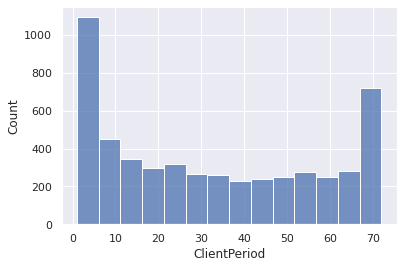

In [196]:
sns.histplot(data[num_cols[0]])

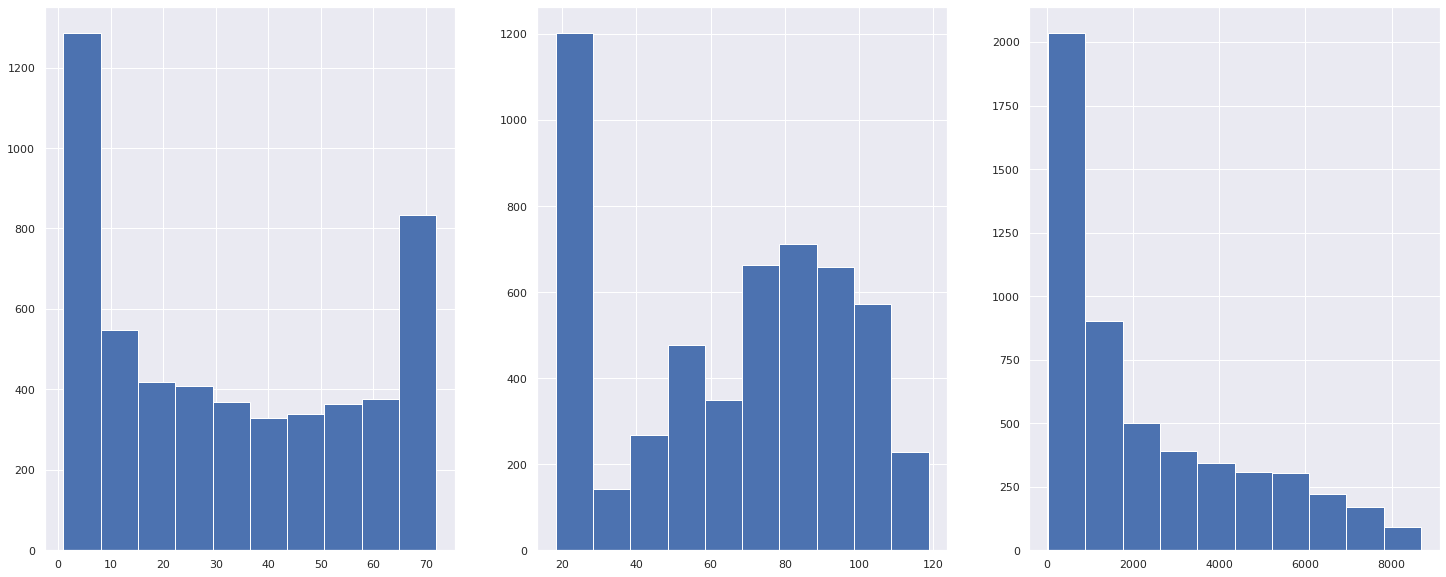

In [197]:
fig, ax = plt.subplots(1,3,figsize=(25,10))
for i in range(len(num_cols)):
  ax[i].hist(data[num_cols[i]])

In [198]:
for i in data.columns:
  print(i, np.sort(data[i].unique()))

ClientPeriod [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
MonthlySpending [ 18.25  18.4   18.7  ... 118.6  118.65 118.75]
TotalSpent [  18.8    18.9    19.05 ... 8670.1  8672.45 8684.8 ]
Sex [0 1]
IsSeniorCitizen [0 1]
HasPartner [0 1]
HasChild [0 1]
HasPhoneService [0 1]
HasMultiplePhoneNumbers ['No' 'No phone service' 'Yes']
HasInternetService ['DSL' 'Fiber optic' 'No']
HasOnlineSecurityService ['No' 'No internet service' 'Yes']
HasOnlineBackup ['No' 'No internet service' 'Yes']
HasDeviceProtection ['No' 'No internet service' 'Yes']
HasTechSupportAccess ['No' 'No internet service' 'Yes']
HasOnlineTV ['No' 'No internet service' 'Yes']
HasMovieSubscription ['No' 'No internet service' 'Yes']
HasContractPhone ['Month-to-month' 'One year' 'Two year']
IsBillingPaperless [0 1]
PaymentMethod ['Bank transfer (automatic)'

In [199]:
for i in data.columns:
  print(i)
  print(data[i].value_counts())

ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
49     45
57     39
39     35
44     34
36     34
Name: ClientPeriod, Length: 72, dtype: int64
MonthlySpending
20.05    46
19.65    35
19.95    34
20.00    32
19.80    32
         ..
65.05     1
73.25     1
95.55     1
98.45     1
98.20     1
Name: MonthlySpending, Length: 1466, dtype: int64
TotalSpent
20.20      9
19.75      8
20.05      6
19.65      6
19.90      5
          ..
41.85      1
4326.25    1
950.20     1
4264.00    1
1375.60    1
Name: TotalSpent, Length: 4977, dtype: int64
Sex
1    2651
0    2622
Name: Sex, dtype: int64
IsSeniorCitizen
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64
HasPartner
0    2704
1    2569
Name: HasPartner, dtype: int64
HasChild
0    3676
1    1597
Name: HasChild, dtype: int64
HasPhoneService
1    4754
0     519
Name: HasPhoneService, dtype: int64
HasMultiplePhoneNumbers
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

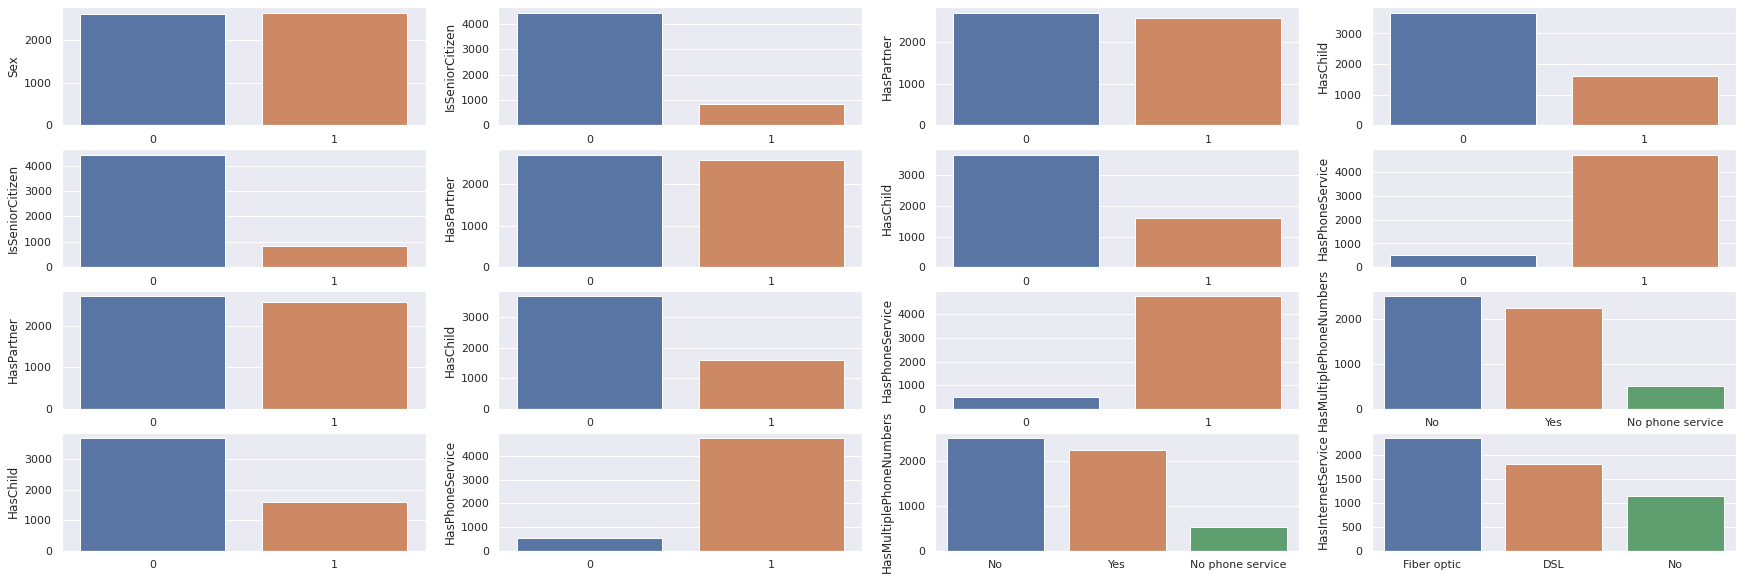

In [200]:
fig, ax = plt.subplots(4, 4, figsize=(30,10))
for ax_row_index, ax_row in enumerate(ax):
  for ax_col_index, ax_col in enumerate(ax_row):
      array_index = ax_row_index + ax_col_index
      barplot = sns.barplot(data[cat_cols[array_index]].value_counts().index, data[cat_cols[array_index]].value_counts(), ax=ax_col)
fig.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [201]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
X, y = data[data.columns[:-1]], data[data.columns[-1]]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X[num_cols], y, train_size=0.8)

In [205]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
model = LogisticRegression()
grid_search = GridSearchCV(model,
                          param_grid={'C':[100, 10, 1, 0.1, 0.01, 0.001]},
                          scoring='roc_auc',
                          cv=5,
                          n_jobs=-1,
                          verbose=10
                          )
grid_search.fit(X_train, y=y_train)
grid_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'C': 0.1}

In [206]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
model = LogisticRegressionCV(scoring='roc_auc', refit=True)
model.fit(X_train, y_train)
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.8086803739689703

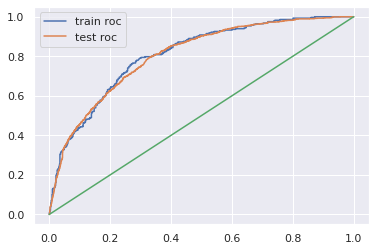

In [207]:
fpr_test, tpr_test, _ = roc_curve(y_train, model.predict_proba(X_train)[:,1])
fpr_train, tpr_train, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr_train, tpr_train, label = 'train roc')
plt.plot(fpr_test, tpr_test, label = 'test roc')
plt.plot([0, 1], [0, 1])
plt.legend()

In [208]:
num_cols_pro = num_cols + ['Sex',	'IsSeniorCitizen',	'HasPartner',	'HasChild',	'HasPhoneService', 'IsBillingPaperless']
X_train, X_test, y_train, y_test = train_test_split(X[num_cols_pro], y, train_size=0.8)

In [209]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
model = LogisticRegression()
grid_search = GridSearchCV(model,
                          param_grid={'C':[100, 10, 1, 0.1, 0.01, 0.001]},
                          scoring='roc_auc',
                          cv=5,
                          n_jobs=-1,
                          verbose=10
                          )
grid_search.fit(X_train, y=y_train)
grid_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'C': 1}

In [217]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

model_1 = LogisticRegressionCV(scoring='roc_auc', refit=True, cv=5)
model_1.fit(X_train, y_train)

model_2 = LogisticRegression(C=0.1)
model_2.fit(X_train,y_train)
print('roc_auc of 1st model', roc_auc_score(y_test, model_1.predict_proba(X_test)[:,1]))
print('roc_auc of 2nd model', roc_auc_score(y_test, model_2.predict_proba(X_test)[:,1]))

roc_auc of 1st model 0.8300536210652844
roc_auc of 2nd model 0.8312697205318907


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [18]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [19]:
from catboost import CatBoostClassifier, CatBoost

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [231]:
boost_model = CatBoostClassifier(iterations=200)
boost_model.fit(X_train, y_train, cat_features=cat_cols,verbose=None)

Learning rate set to 0.083332
0:	learn: 0.6395759	total: 25ms	remaining: 4.97s
1:	learn: 0.6005845	total: 58.2ms	remaining: 5.76s
2:	learn: 0.5658385	total: 94.9ms	remaining: 6.23s
3:	learn: 0.5383869	total: 130ms	remaining: 6.38s
4:	learn: 0.5194902	total: 145ms	remaining: 5.65s
5:	learn: 0.5006172	total: 173ms	remaining: 5.61s
6:	learn: 0.4829312	total: 191ms	remaining: 5.26s
7:	learn: 0.4699659	total: 208ms	remaining: 5s
8:	learn: 0.4606263	total: 239ms	remaining: 5.08s
9:	learn: 0.4504558	total: 283ms	remaining: 5.38s
10:	learn: 0.4439237	total: 315ms	remaining: 5.42s
11:	learn: 0.4388774	total: 350ms	remaining: 5.48s
12:	learn: 0.4349051	total: 366ms	remaining: 5.26s
13:	learn: 0.4290016	total: 404ms	remaining: 5.37s
14:	learn: 0.4246316	total: 431ms	remaining: 5.31s
15:	learn: 0.4230503	total: 448ms	remaining: 5.15s
16:	learn: 0.4190400	total: 494ms	remaining: 5.32s
17:	learn: 0.4158222	total: 531ms	remaining: 5.36s
18:	learn: 0.4145644	total: 556ms	remaining: 5.3s
19:	learn: 0.4

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [232]:
roc_auc_score(y_test, boost_model.predict_proba(X_test)[:, 1])

0.8221406718974686

In [258]:
better_boost_model = CatBoostClassifier()
param_grid={'learning_rate':[1, 0.1, 0.01, 0.001, 0.05],
            'iterations':[50, 100, 150, 200, 250],
            'depth':[1, 2, 3, 4, 5],
           }
grid_search = GridSearchCV(estimator=better_boost_model,
                          param_grid=param_grid,
                          cv=5,
                           verbose=0,
                           n_jobs=-1,
                           scoring='roc_auc'
                          )
grid_search.fit(X_train, y=y_train,cat_features=cat_cols)
grid_search.best_params_

0:	learn: 0.6457678	total: 5.49ms	remaining: 1.37s
1:	learn: 0.6150494	total: 10.7ms	remaining: 1.32s
2:	learn: 0.5848787	total: 15.9ms	remaining: 1.31s
3:	learn: 0.5608462	total: 20.7ms	remaining: 1.27s
4:	learn: 0.5433696	total: 25.2ms	remaining: 1.23s
5:	learn: 0.5284230	total: 29.7ms	remaining: 1.21s
6:	learn: 0.5105367	total: 34.5ms	remaining: 1.2s
7:	learn: 0.4949189	total: 39.1ms	remaining: 1.18s
8:	learn: 0.4819371	total: 43.1ms	remaining: 1.15s
9:	learn: 0.4720043	total: 47.6ms	remaining: 1.14s
10:	learn: 0.4652000	total: 52.2ms	remaining: 1.13s
11:	learn: 0.4590335	total: 56.9ms	remaining: 1.13s
12:	learn: 0.4533681	total: 61.2ms	remaining: 1.12s
13:	learn: 0.4497347	total: 66.1ms	remaining: 1.11s
14:	learn: 0.4459606	total: 70.2ms	remaining: 1.1s
15:	learn: 0.4417350	total: 74.6ms	remaining: 1.09s
16:	learn: 0.4393658	total: 78.9ms	remaining: 1.08s
17:	learn: 0.4359429	total: 83.3ms	remaining: 1.07s
18:	learn: 0.4331691	total: 87.6ms	remaining: 1.06s
19:	learn: 0.4304150	tot

{'depth': 2, 'iterations': 250, 'learning_rate': 0.1}

In [259]:
boost_model = CatBoostClassifier(**grid_search.best_params_)
boost_model.fit(X_train, y_train, cat_features=cat_cols,verbose=None)

0:	learn: 0.6457678	total: 5.44ms	remaining: 1.35s
1:	learn: 0.6150494	total: 11.5ms	remaining: 1.43s
2:	learn: 0.5848787	total: 17.7ms	remaining: 1.46s
3:	learn: 0.5608462	total: 22.8ms	remaining: 1.4s
4:	learn: 0.5433696	total: 27.5ms	remaining: 1.35s
5:	learn: 0.5284230	total: 32.4ms	remaining: 1.32s
6:	learn: 0.5105367	total: 37.7ms	remaining: 1.31s
7:	learn: 0.4949189	total: 42.5ms	remaining: 1.28s
8:	learn: 0.4819371	total: 46.7ms	remaining: 1.25s
9:	learn: 0.4720043	total: 51.3ms	remaining: 1.23s
10:	learn: 0.4652000	total: 56.3ms	remaining: 1.22s
11:	learn: 0.4590335	total: 61.1ms	remaining: 1.21s
12:	learn: 0.4533681	total: 65.6ms	remaining: 1.2s
13:	learn: 0.4497347	total: 70.3ms	remaining: 1.18s
14:	learn: 0.4459606	total: 74.7ms	remaining: 1.17s
15:	learn: 0.4417350	total: 79.5ms	remaining: 1.16s
16:	learn: 0.4393658	total: 83.9ms	remaining: 1.15s
17:	learn: 0.4359429	total: 88.6ms	remaining: 1.14s
18:	learn: 0.4331691	total: 93.3ms	remaining: 1.13s
19:	learn: 0.4304150	tot

In [260]:
roc_auc_score(y_test, boost_model.predict_proba(X_test)[:, 1])

0.824963567754326

In [24]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4750,11,111.40,1183.05,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4101,72,106.10,7848.50,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic)
3102,5,69.95,320.40,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic)
205,60,94.15,5811.80,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,One year,No,Bank transfer (automatic)
2295,57,53.45,3053.00,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,12,24.95,280.40,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic)
2278,71,79.10,5564.85,Male,0,Yes,No,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4774,64,25.55,1714.95,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
2168,40,80.75,3208.65,Female,0,No,No,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check


In [25]:
cb_model = CatBoostClassifier(
    loss_function='Logloss',
    cat_features=cat_cols,
    random_seed = 42,
    eval_metric='AUC',
    verbose=False)

In [26]:
 cb_model.grid_search({'l2_leaf_reg': np.linspace(4, 5, 5),
                      'max_depth': [3],
                      'n_estimators': [200, 300, 400],
                      'learning_rate': np.linspace(0.01, 0.2, 10)},
                      X_train,
                      y_train,
                      cv=3,
                      refit=True,
                      verbose=False)


bestTest = 0.8416473599
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8489021059
bestIteration = 197

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8493205159
bestIteration = 197

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.848473322
bestIteration = 123

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8483004253
bestIteration = 100

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8478820153
bestIteration = 75

Metric AUC is not calculated on train by default. To cal

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [28]:
best_cb_model = CatBoostClassifier(
                loss_function='Logloss',
                cat_features=cat_cols,
                random_seed = 42,
                eval_metric='AUC',
                verbose=False,
                **{'depth': 3,
                'iterations': 200,
                'l2_leaf_reg': 4.5,
                'learning_rate': 0.11555555555555556}
    )

In [30]:
best_cb_model.fit(X_train, y_train)
roc_auc_score(y_test, best_cb_model.predict_proba(X_test)[:,1])

0.8511655597105171

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.